In [1]:
#Import all libraries

from google.colab import files
import io
import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
import pdb
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [3]:
train_data=pd.read_csv("adult_with_headers.csv")

In [6]:
display(train_data)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
train_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# **Useful Functions**

In [13]:
def dataset_description(df_obj):
  ##describe the dataset
  print('Dataset shape: %s\n' % (df_obj.shape, ))
  print('Dataset columns: %s\n' % df_obj.columns)

  print('Dataset first and last rows:\n' % df_obj.columns)
  display(df_obj)
  #display(df_obj.head())
  #display(df_obj.tail())

  print('\nColumns description:\n')
  display(df_obj.info())
  display(df_obj.describe())

  print('\nNull values:\n')
  display(df_obj.isnull().sum())

In [15]:
def categorical_feature_analysis(df, var_name):
  ##var_name is the feature to be analyzed
  print('Data values by class of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(dropna=False))) #total feature values by category
  print('Percentage of data values by class of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(normalize=True, dropna=False))) #percentage of total feature values by category
  print('Unique values of feature %s:\n%s\n'  % (var_name, df[var_name].unique())) #feature's unique values

def continuous_feature_analysis(df, var_name):
  ##var_name is the feature to be analyzed
  print('Distribution of data values of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(dropna=False))) #distribution of feature values
  print('Percentage of data distribution of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(normalize=True, dropna=False))) #percentage of distribution of feature values
  #print('Unique values of feature %s (sorted) (%i):\n%s\n'  % (var_name, len(df[var_name].unique()), sorted(df[var_name].unique()))) #feature's unique values
  print('Total unique values of feature %s: %i\n'  % (var_name, len(df[var_name].unique()))) #feature's unique values
  display(df[var].describe())

In [17]:
def std_features_all(all_X, vars):
  ##standardize features
  std_sca=StandardScaler()
  std_sca.fit(all_X[vars])
  all_X.loc[:, vars]=std_sca.transform(all_X[vars])
  return all_X

def std_features(train_X, val_X, vars):
  ##standardize features
  std_sca=StandardScaler()
  std_sca.fit(train_X[vars])
  train_X.loc[:, vars]=std_sca.transform(train_X[vars])
  val_X.loc[:, vars]=std_sca.transform(val_X[vars])
  return train_X, val_X

def norm_features(train_X, val_X, vars):
  ##min-max normalization
  mm_sca=MinMaxScaler()
  mm_sca.fit(train_X[vars])
  train_X.loc[:, vars]=mm_sca.transform(train_X[vars])
  val_X.loc[:, vars]=mm_sca.transform(val_X[vars])
  return train_X, val_X

In [18]:
def get_correlations(obj_corr, corr_threshold=0.5):
  ##create a dict with the highest correlations and remove the duplicated combinations between all dataset features
  series = obj_corr.unstack()
  dict_corr={} #key=tuple of feature, value=corr
  for index, value in series.items():
      if (index[0]!=index[1]) and (abs(value) > corr_threshold) and ((index[0], index[1]) not in dict_corr) and ((index[1], index[0]) not in dict_corr):
        dict_corr[(index[0], index[1])]=value

  return dict_corr

In [19]:
def calc_performance_metrics(model_name, real_y, prediction):
  ##classification metrics
  calc_accuracy=accuracy_score(real_y, prediction)
  calc_recall=recall_score(real_y, prediction)
  calc_precision=precision_score(real_y, prediction)
  calc_f1=f1_score(real_y, prediction)

  print(model_name+' prediction | Classification metric:')
  print('Accuracy:', calc_accuracy)
  print('Recall:', calc_recall)
  print('Precision:', calc_precision)
  print('F1:', calc_f1)
  return calc_accuracy, calc_recall, calc_precision, calc_f1

def calc_confusion_matrix(real_y, prediction):
  ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(real_y, prediction), display_labels=['<=$50K', '>$50K']).plot()
  tn, fp, fn, tp=confusion_matrix(real_y, prediction).ravel()
  print('\nTN: ', tn, 'FP: ', fp, 'FN: ', fn, 'TP: ', tp)


In [14]:
dataset_description(train_data)

Dataset shape: (32561, 15)

Dataset columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Dataset first and last rows:



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K



Columns description:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



Null values:



,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


# **Feature Analysis**

Data values by class of feature income:
income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

Percentage of data values by class of feature income:
income
 <=50K    0.75919
 >50K     0.24081
Name: proportion, dtype: float64

Unique values of feature income:
[' <=50K' ' >50K']



[Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')]

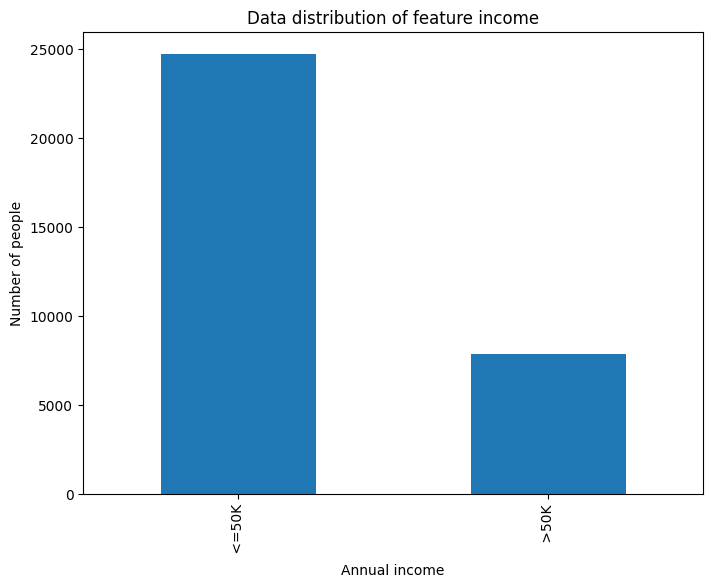

In [20]:
var='income'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts().plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of people')
ax.set_xlabel('Annual income')
ax.set_xticklabels(labels=[' <=50K', ' >50K'])

Distribution of data values of feature age:
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

Percentage of data distribution of feature age:
age
36    0.027579
31    0.027272
34    0.027210
23    0.026934
35    0.026903
        ...   
83    0.000184
88    0.000092
85    0.000092
86    0.000031
87    0.000031
Name: proportion, Length: 73, dtype: float64

Total unique values of feature age: 73



,age
count,32561.000000
mean,38.581647
std,13.640433
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


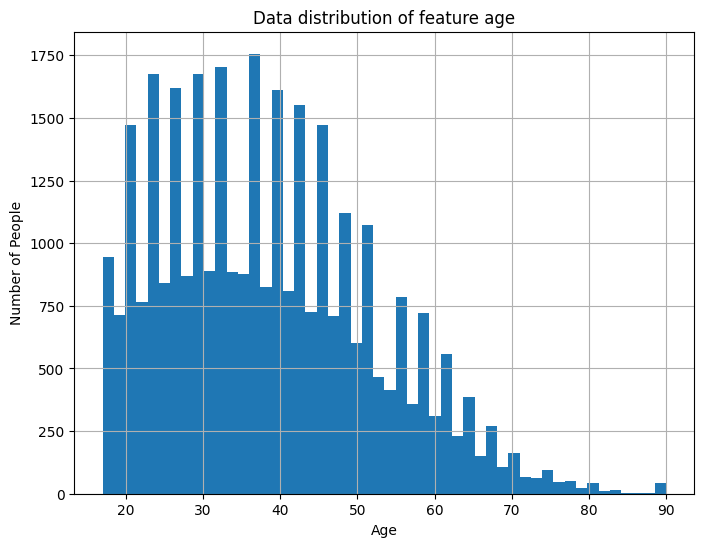

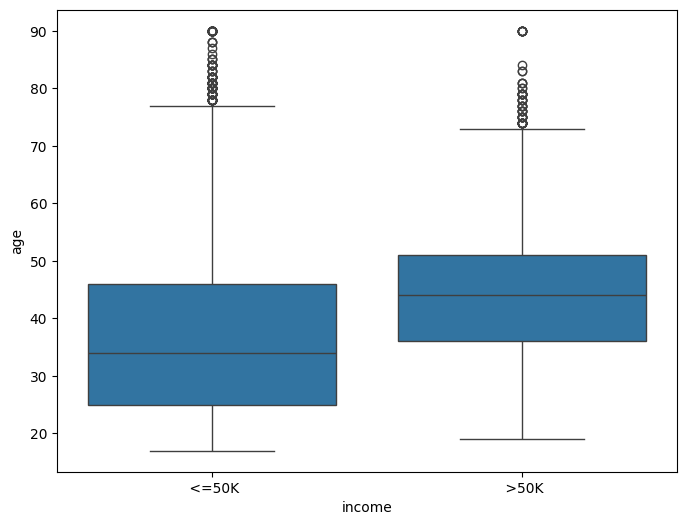

In [21]:
#**Feature *age***

var='age'
continuous_feature_analysis(train_data, var)

ax=train_data[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Age')
plt.show()

sns.boxplot(y='age', x='income', data=train_data)
plt.show()


Distribution of data values of feature fnlwgt:
fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: count, Length: 21648, dtype: int64

Percentage of data distribution of feature fnlwgt:
fnlwgt
164190    0.000399
203488    0.000399
123011    0.000399
148995    0.000369
121124    0.000369
            ...   
232784    0.000031
325573    0.000031
140176    0.000031
318264    0.000031
257302    0.000031
Name: proportion, Length: 21648, dtype: float64

Total unique values of feature fnlwgt: 21648



,fnlwgt
count,3.256100e+04
mean,1.897784e+05
std,1.055500e+05
min,1.228500e+04
25%,1.178270e+05
50%,1.783560e+05
75%,2.370510e+05
max,1.484705e+06


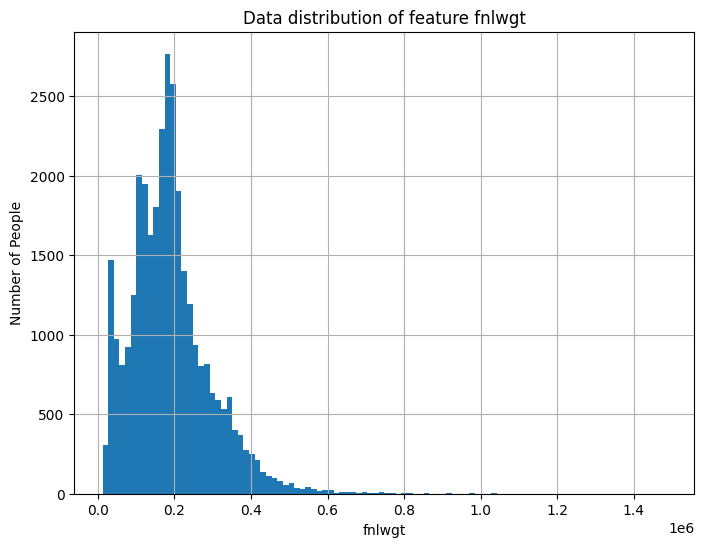

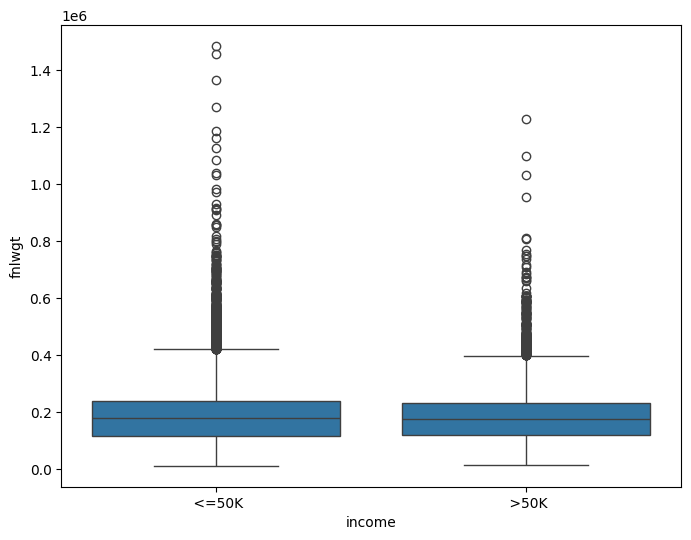

In [22]:
#**Feature *fnlwgt***

var='fnlwgt'
continuous_feature_analysis(train_data, var)

ax=train_data[var].hist(bins=100)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('fnlwgt')
plt.show()

sns.boxplot(y='fnlwgt', x='income', data=train_data)
plt.show()

Data values by class of feature education:
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

Percentage of data values by class of feature education:
education
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: proportion, dtype: float64

Unique values of feature education:

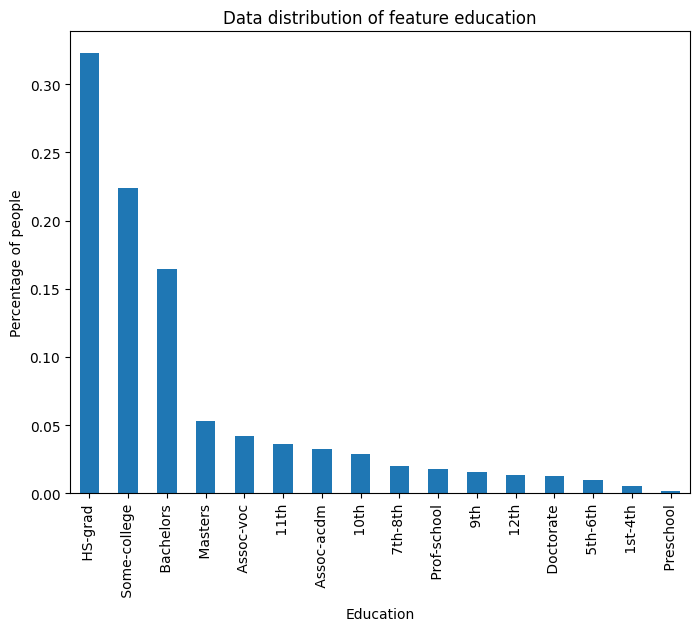

Percentage of people with HS-grad that makes >$50K/yr:  5.144190903227788
Percentage of people with some college degree that makes >$50K/yr:  4.259697183747428
Percentage of people with bachelors that makes >$50K/yr:  6.821043579742637
Percentage of people with doctorate degree that makes >$50K/yr:  0.9397745769478825


income,<=50K,>50K
education,,
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
Assoc-acdm,0.751640,0.248360
Assoc-voc,0.738784,0.261216


Text(0, 0.5, 'Percentage of People (normalized by class)')

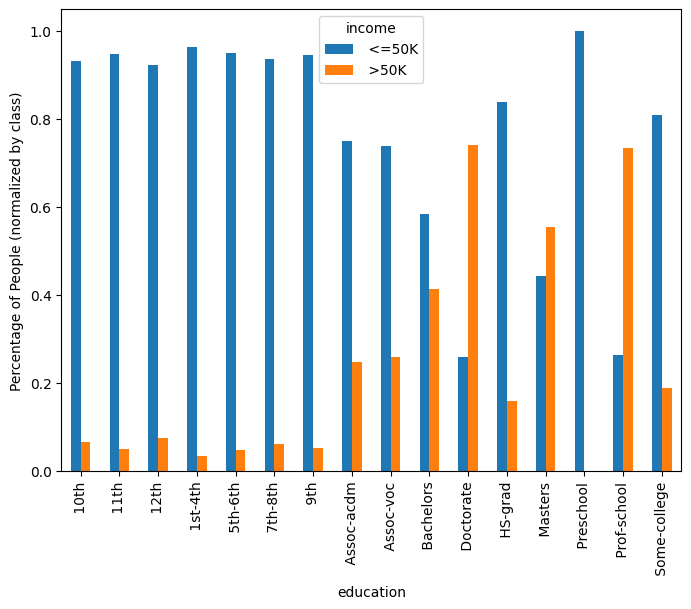

In [23]:
#**Feature *education***

var='education'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Education')
ax.set_xticklabels(labels=[' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc', ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th', ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'])
plt.show()

print('Percentage of people with HS-grad that makes >$50K/yr: ', len(train_data[(train_data['education']==' HS-grad') & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people with some college degree that makes >$50K/yr: ', len(train_data[(train_data['education']==' Some-college') & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people with bachelors that makes >$50K/yr: ', len(train_data[(train_data['education']==' Bachelors') & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people with doctorate degree that makes >$50K/yr: ', len(train_data[(train_data['education']==' Doctorate') & (train_data['income']==' >50K')])/len(train_data)*100)

#pd.crosstab([train_data['education'], train_data['workclass']], train_data['income'], normalize='index')
display(pd.crosstab([train_data['education']], train_data['income'], normalize='index'))

pd.crosstab([train_data['education']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

Distribution of data values of feature education_num:
education_num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

Percentage of data distribution of feature education_num:
education_num
9     0.322502
10    0.223918
13    0.164461
14    0.052916
11    0.042443
7     0.036086
12    0.032769
6     0.028654
4     0.019840
15    0.017690
5     0.015786
8     0.013298
16    0.012684
3     0.010227
2     0.005160
1     0.001566
Name: proportion, dtype: float64

Total unique values of feature education_num: 16



,education_num
count,32561.000000
mean,10.080679
std,2.572720
min,1.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,16.000000


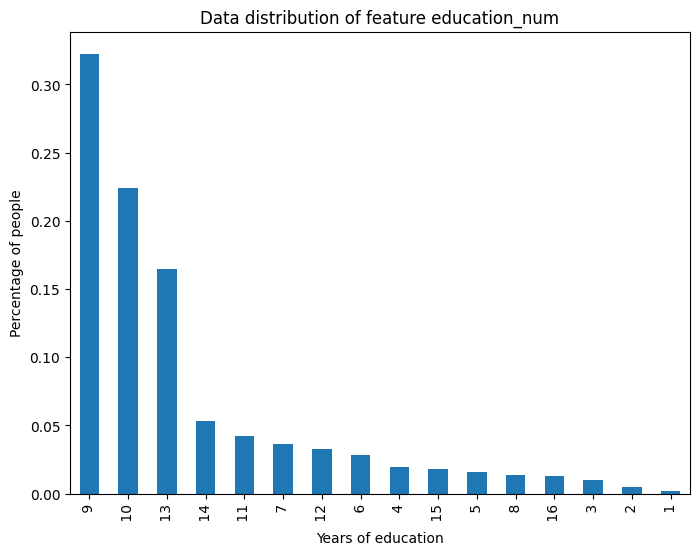

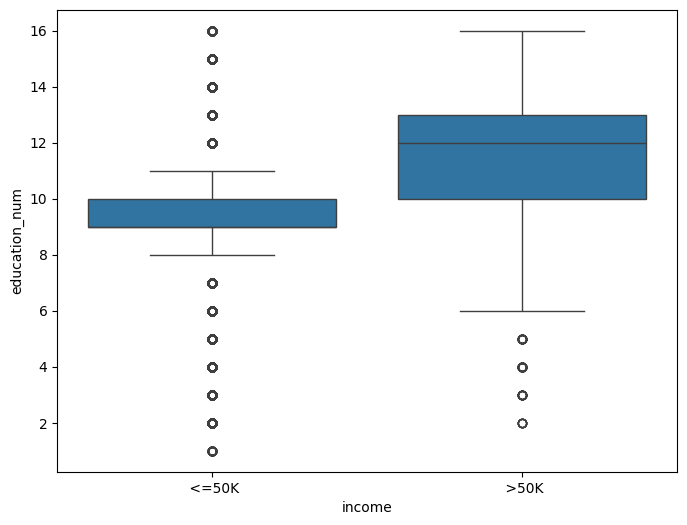

income,<=50K,>50K
education_num,,
1,1.000000,0.000000
2,0.964286,0.035714
3,0.951952,0.048048
4,0.938080,0.061920
5,0.947471,0.052529
6,0.933548,0.066452
7,0.948936,0.051064
8,0.923788,0.076212
9,0.840491,0.159509


Text(0, 0.5, 'Percentage of People (normalized by class)')

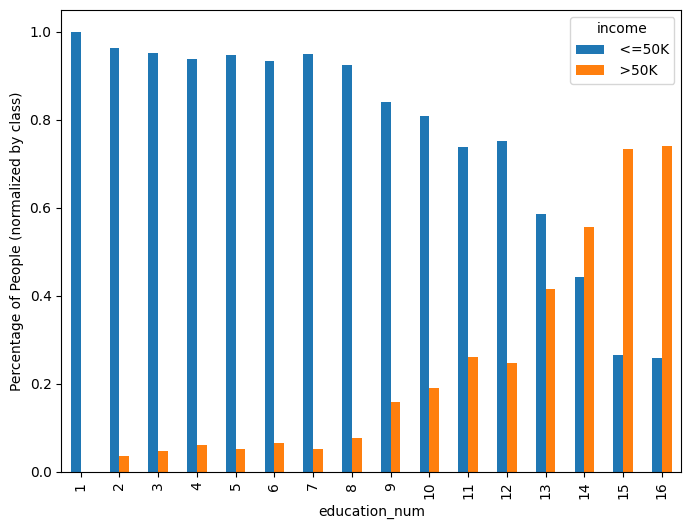

In [24]:
#**Feature *education-num***

var='education_num'
continuous_feature_analysis(train_data, var)

ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Years of education')
ax.set_xticklabels(labels=[' 9', ' 10', ' 13', ' 14', ' 11', ' 7', ' 12', ' 6', ' 4', ' 15', ' 5', ' 8', ' 16', ' 3', ' 2', ' 1'])
plt.show()

sns.boxplot(y='education_num', x='income', data=train_data)
plt.show()

#pd.crosstab([train_data['education'], train_data['workclass']], train_data['income'], normalize='index')
display(pd.crosstab([train_data['education_num']], train_data['income'], normalize='index'))

pd.crosstab([train_data['education_num']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')


Data values by class of feature workclass:
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

Percentage of data values by class of feature workclass:
workclass
 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: proportion, dtype: float64

Unique values of feature workclass:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']



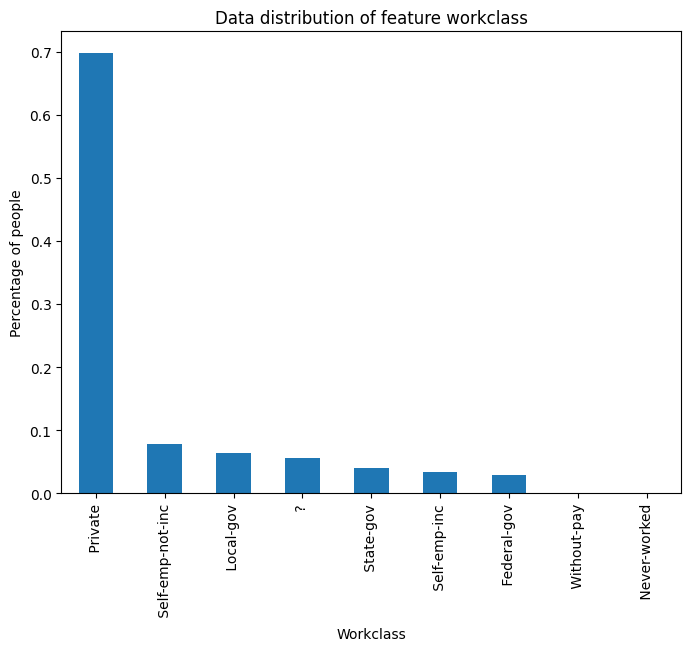

Percentage of people from the private sector that makes >$50K/yr:  15.24216086729523
Percentage of people from the private sector that makes <=$50K/yr:  54.460858081754246
Percentage of people from the other sectors that makes >$50K/yr:  8.838794877307208
Percentage of people from the other sectors that makes <=$50K/yr:  21.458186173643316


income,<=50K,>50K
workclass,,
?,0.895969,0.104031
Federal-gov,0.613542,0.386458
Local-gov,0.705208,0.294792
Never-worked,1.000000,0.000000
Private,0.781327,0.218673
Self-emp-inc,0.442652,0.557348
Self-emp-not-inc,0.715073,0.284927
State-gov,0.728043,0.271957
Without-pay,1.000000,0.000000


Text(0, 0.5, 'Percentage of People (normalized by class)')

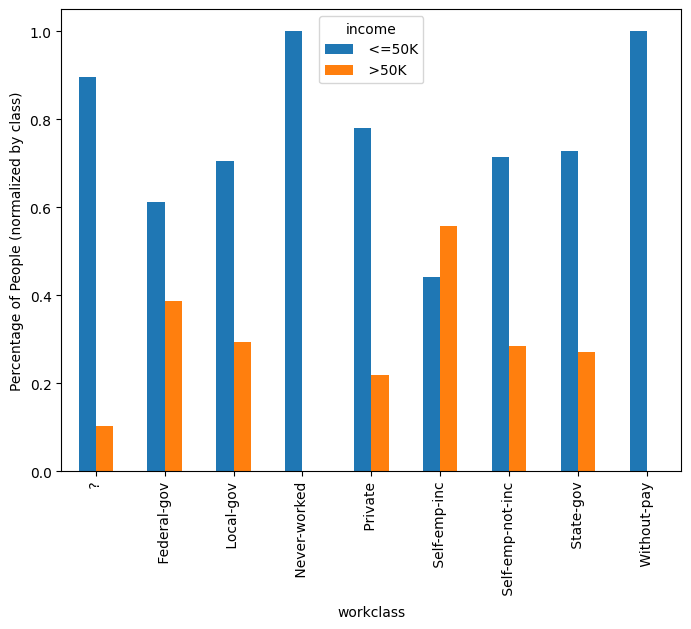

In [25]:
#**Feature *workclass***

var='workclass'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Workclass')
ax.set_xticklabels(labels=[' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'])
plt.show()

print('Percentage of people from the private sector that makes >$50K/yr: ', len(train_data[(train_data['workclass']==' Private') & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people from the private sector that makes <=$50K/yr: ', len(train_data[(train_data['workclass']==' Private') & (train_data['income']==' <=50K')])/len(train_data)*100)
print('Percentage of people from the other sectors that makes >$50K/yr: ', len(train_data[(train_data['workclass']!=' Private') & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people from the other sectors that makes <=$50K/yr: ', len(train_data[(train_data['workclass']!=' Private') & (train_data['income']==' <=50K')])/len(train_data)*100)

display(pd.crosstab([train_data['workclass']], train_data['income'], normalize='index'))

pd.crosstab([train_data['workclass']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

Data values by class of feature occupation:
occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

Percentage of data values by class of feature occupation:
occupation
 Prof-specialty       0.127146
 Craft-repair         0.125887
 Exec-managerial      0.124873
 Adm-clerical         0.115783
 Sales                0.112097
 Other-service        0.101195
 Machine-op-inspct    0.061485
 ?                    0.056601
 Transport-moving     0.049046
 Handlers-cleaners    0.042075
 Farming-fishing      0.030527
 Tech-support         0.028500
 Protective-serv      0.019932
 Priv-house-serv      0.004576
 Armed-For

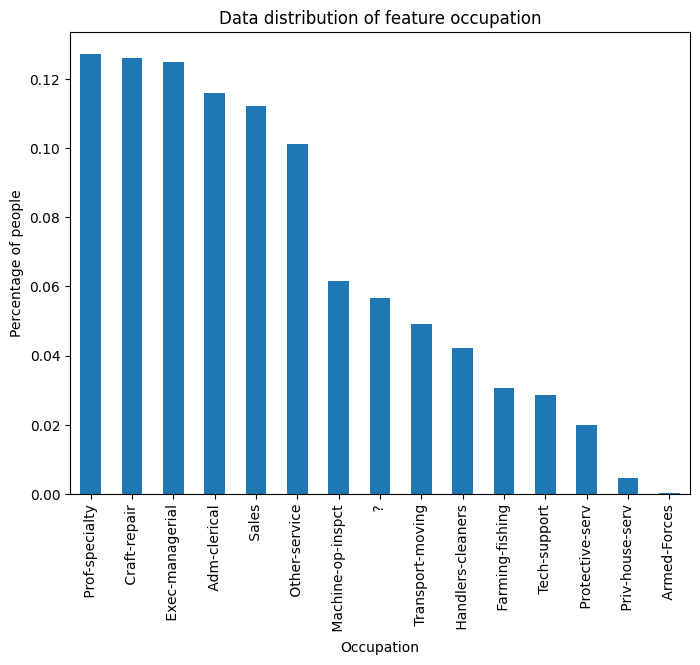

income,<=50K,>50K
occupation,,
?,0.896365,0.103635
Adm-clerical,0.865517,0.134483
Armed-Forces,0.888889,0.111111
Craft-repair,0.773359,0.226641
Exec-managerial,0.515986,0.484014
Farming-fishing,0.884306,0.115694
Handlers-cleaners,0.937226,0.062774
Machine-op-inspct,0.875125,0.124875
Other-service,0.958422,0.041578


Text(0, 0.5, 'Percentage of People (normalized by class)')

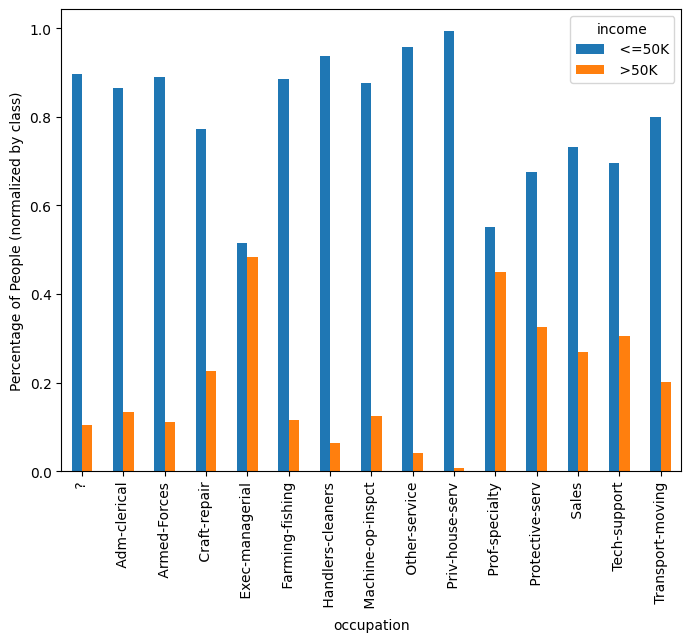

In [26]:

#**Feature *occupation***

var='occupation'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Occupation')
ax.set_xticklabels(labels=[' Prof-specialty', ' Craft-repair', ' Exec-managerial', ' Adm-clerical', ' Sales', ' Other-service', ' Machine-op-inspct', ' ?', ' Transport-moving', ' Handlers-cleaners',
                           ' Farming-fishing', ' Tech-support', ' Protective-serv', ' Priv-house-serv', ' Armed-Forces'])
plt.show()

display(pd.crosstab([train_data['occupation']], train_data['income'], normalize='index'))

pd.crosstab([train_data['occupation']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

Data values by class of feature marital_status:
marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

Percentage of data values by class of feature marital_status:
marital_status
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: proportion, dtype: float64

Unique values of feature marital_status:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']



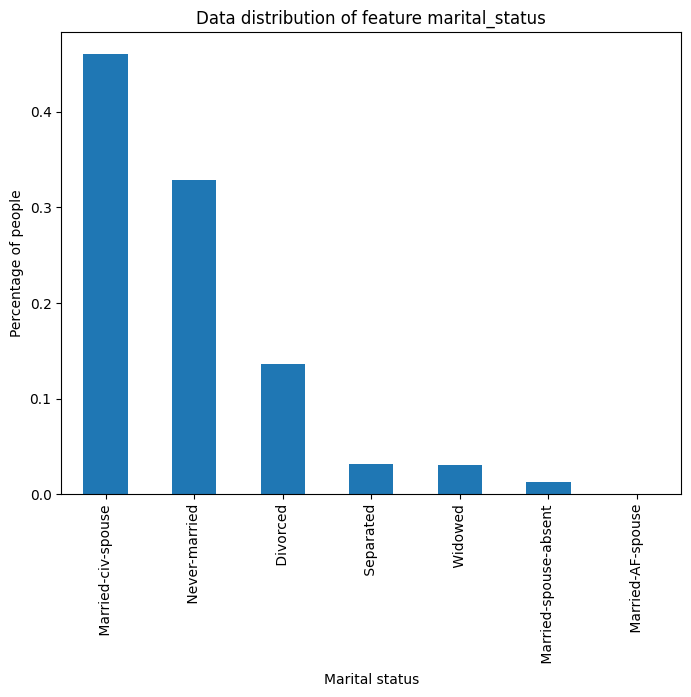

income,<=50K,>50K
marital_status,,
Divorced,0.895791,0.104209
Married-AF-spouse,0.565217,0.434783
Married-civ-spouse,0.553152,0.446848
Married-spouse-absent,0.918660,0.081340
Never-married,0.954039,0.045961
Separated,0.935610,0.064390
Widowed,0.914401,0.085599


Text(0, 0.5, 'Percentage of People (normalized by class)')

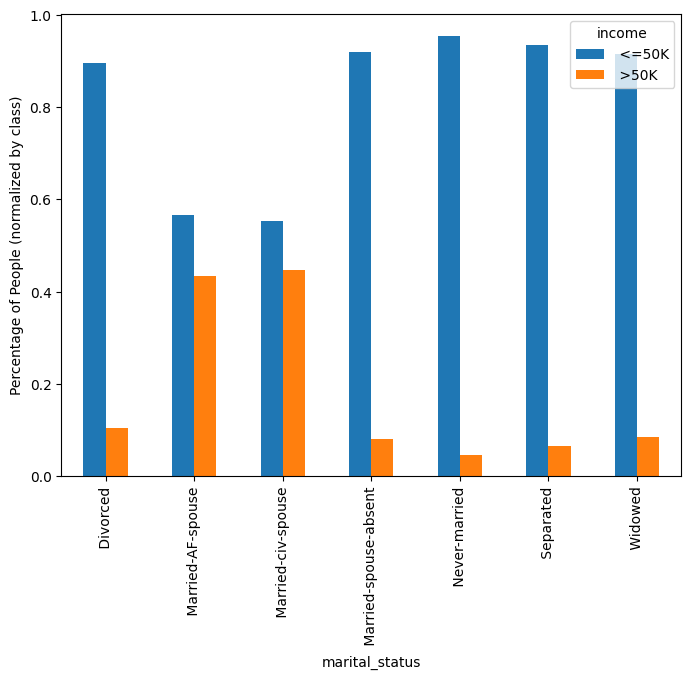

In [27]:

#**Feature *marital-status***

var='marital_status'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Marital status')
ax.set_xticklabels(labels=[' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated', ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'])
plt.show()

display(pd.crosstab([train_data['marital_status']], train_data['income'], normalize='index'))

pd.crosstab([train_data['marital_status']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

Data values by class of feature relationship:
relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

Percentage of data values by class of feature relationship:
relationship
 Husband           0.405178
 Not-in-family     0.255060
 Own-child         0.155646
 Unmarried         0.105832
 Wife              0.048156
 Other-relative    0.030128
Name: proportion, dtype: float64

Unique values of feature relationship:
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']



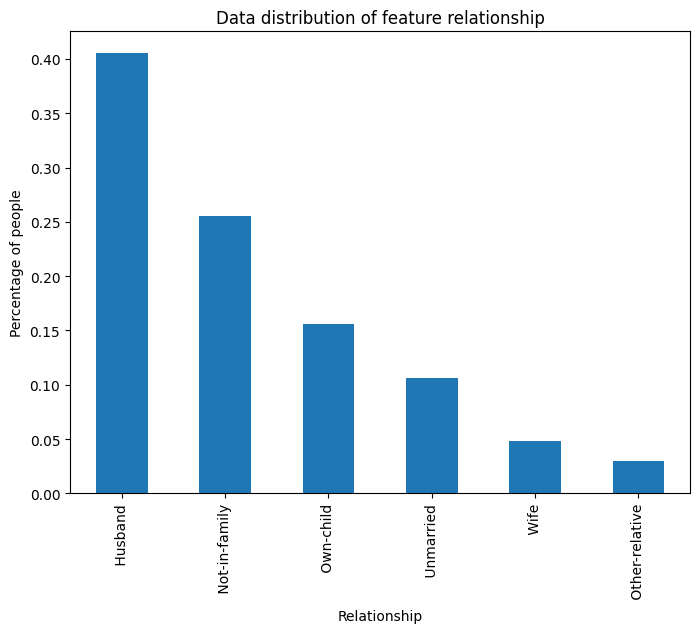

income,<=50K,>50K
relationship,,
Husband,0.551429,0.448571
Not-in-family,0.896930,0.103070
Other-relative,0.962283,0.037717
Own-child,0.986780,0.013220
Unmarried,0.936738,0.063262
Wife,0.524872,0.475128


Text(0, 0.5, 'Percentage of People (normalized by class)')

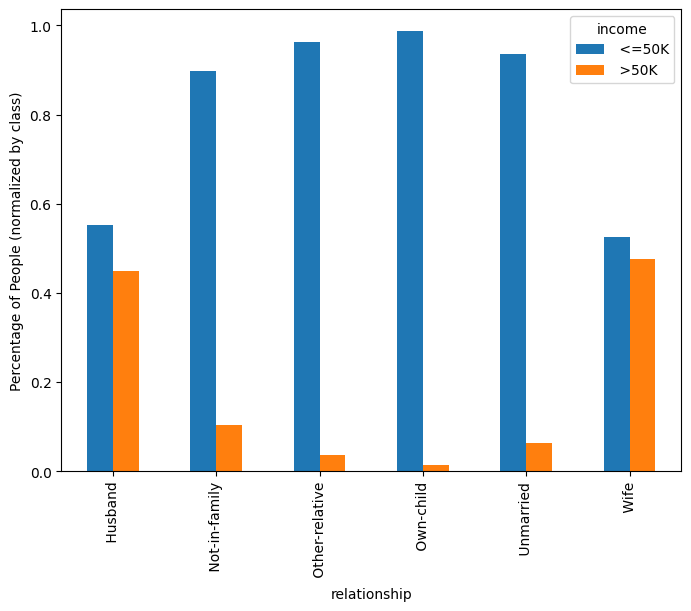

In [28]:
#**Feature *relationship***

var='relationship'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Relationship')
ax.set_xticklabels(labels=[' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife', ' Other-relative'])
plt.show()

display(pd.crosstab([train_data['relationship']], train_data['income'], normalize='index'))

pd.crosstab([train_data['relationship']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

Data values by class of feature race:
race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

Percentage of data values by class of feature race:
race
 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: proportion, dtype: float64

Unique values of feature race:
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']



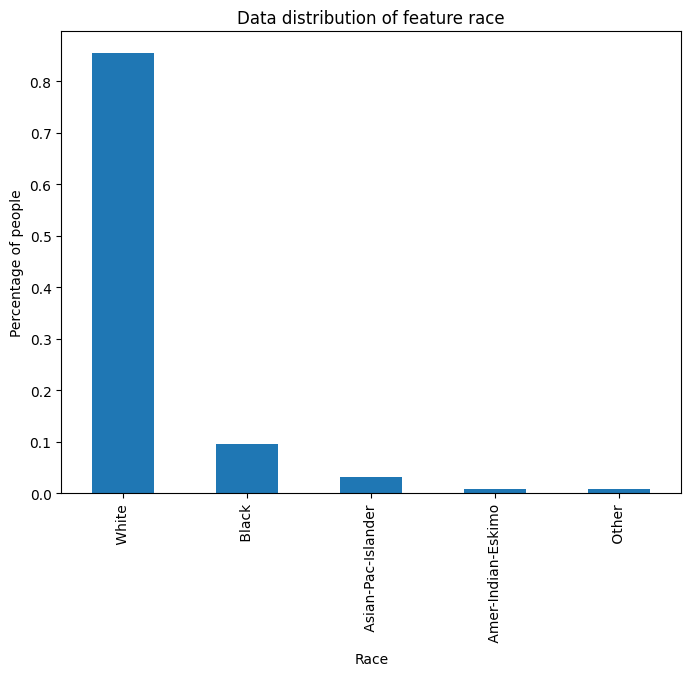

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.884244,0.115756
Asian-Pac-Islander,0.734360,0.265640
Black,0.876120,0.123880
Other,0.907749,0.092251
White,0.744140,0.255860


Text(0, 0.5, 'Percentage of People (normalized by class)')

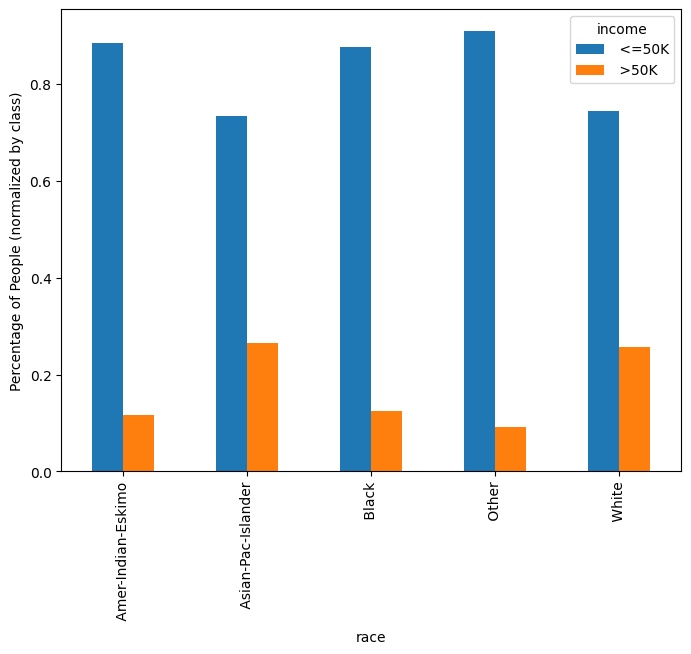

In [29]:
#**Feature *race***

var='race'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Race')
ax.set_xticklabels(labels=[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'])
plt.show()

display(pd.crosstab([train_data['race']], train_data['income'], normalize='index'))

pd.crosstab([train_data['race']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')

Data values by class of feature sex:
sex
 Male      21790
 Female    10771
Name: count, dtype: int64

Percentage of data values by class of feature sex:
sex
 Male      0.669205
 Female    0.330795
Name: proportion, dtype: float64

Unique values of feature sex:
[' Male' ' Female']



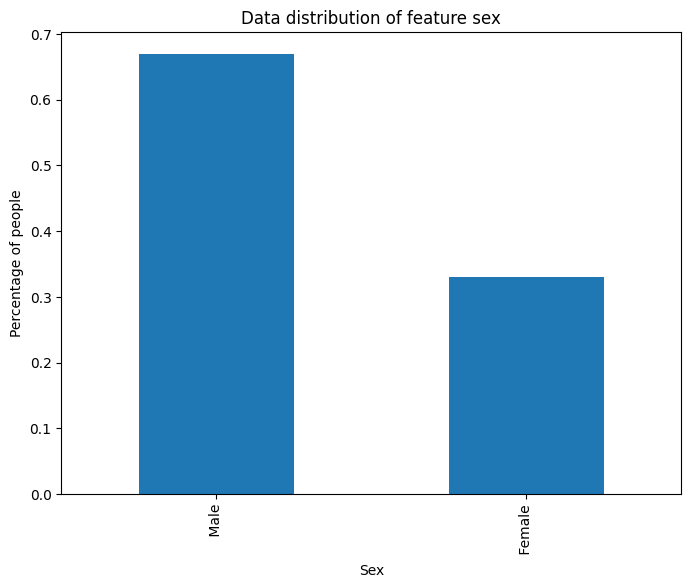

income,<=50K,>50K
sex,,
Female,0.890539,0.109461
Male,0.694263,0.305737


Text(0, 0.5, 'Percentage of People (normalized by class)')

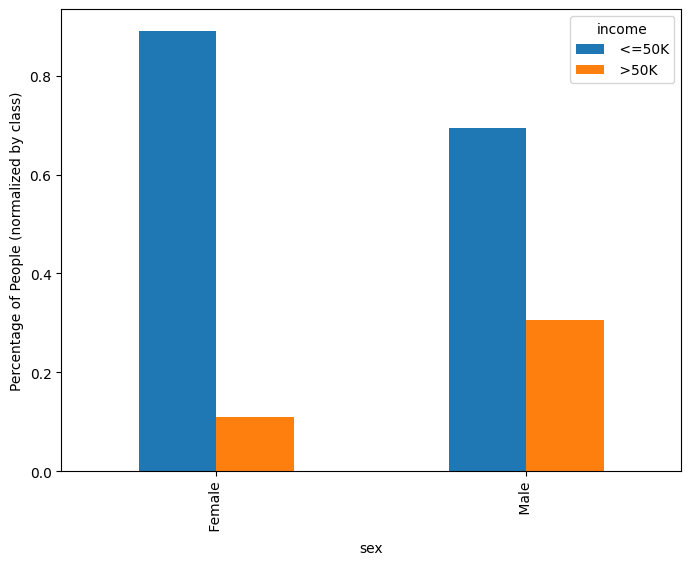

In [30]:
#**Feature *sex***

var='sex'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Sex')
ax.set_xticklabels(labels=[' Male', ' Female'])
plt.show()

display(pd.crosstab([train_data['sex']], train_data['income'], normalize='index'))

pd.crosstab([train_data['sex']], train_data['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')


Distribution of data values of feature capital_gain:
capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

Percentage of data distribution of feature capital_gain:
capital_gain
0        0.916710
15024    0.010657
7688     0.008722
7298     0.007555
99999    0.004883
           ...   
1111     0.000031
2538     0.000031
22040    0.000031
4931     0.000031
5060     0.000031
Name: proportion, Length: 119, dtype: float64

Total unique values of feature capital_gain: 119



,capital_gain
count,32561.000000
mean,1077.648844
std,7385.292085
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,99999.000000


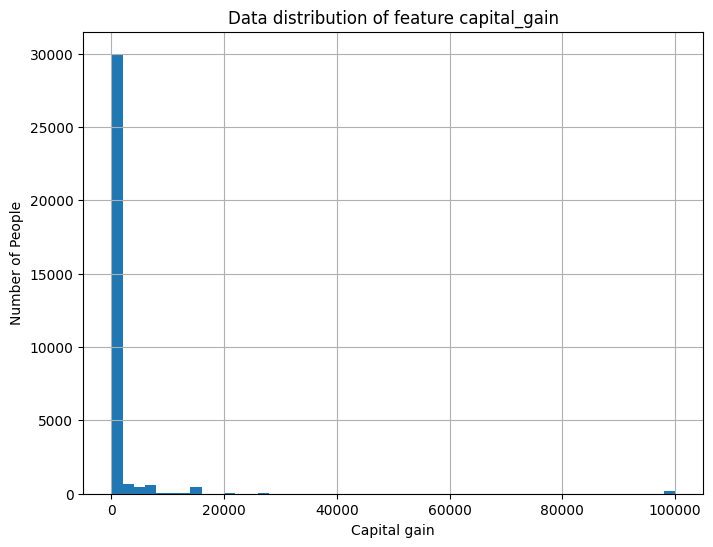

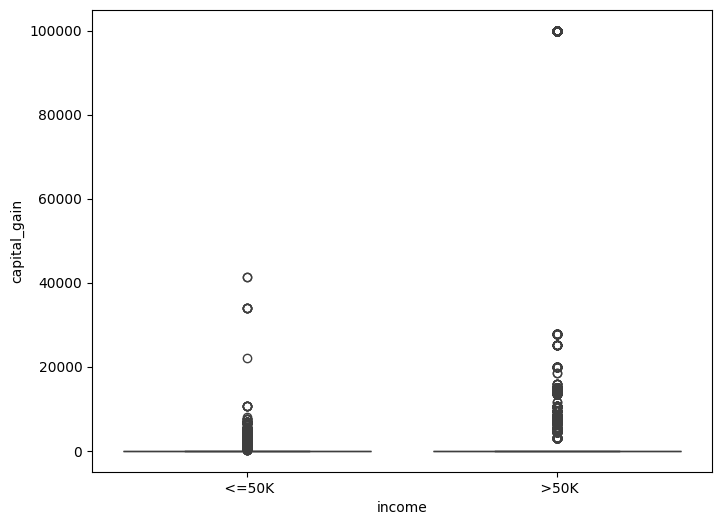

In [31]:
#**Feature *capital-gain***

var='capital_gain'
continuous_feature_analysis(train_data, var)

ax=train_data[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Capital gain')
plt.show()

sns.boxplot(y='capital_gain', x='income', data=train_data)
plt.show()


Distribution of data values of feature capital_loss:
capital_loss
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

Percentage of data distribution of feature capital_loss:
capital_loss
0       0.953349
1902    0.006204
1977    0.005160
1887    0.004883
1848    0.001566
          ...   
2080    0.000031
1539    0.000031
1844    0.000031
2489    0.000031
1411    0.000031
Name: proportion, Length: 92, dtype: float64

Total unique values of feature capital_loss: 92



,capital_loss
count,32561.000000
mean,87.303830
std,402.960219
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4356.000000


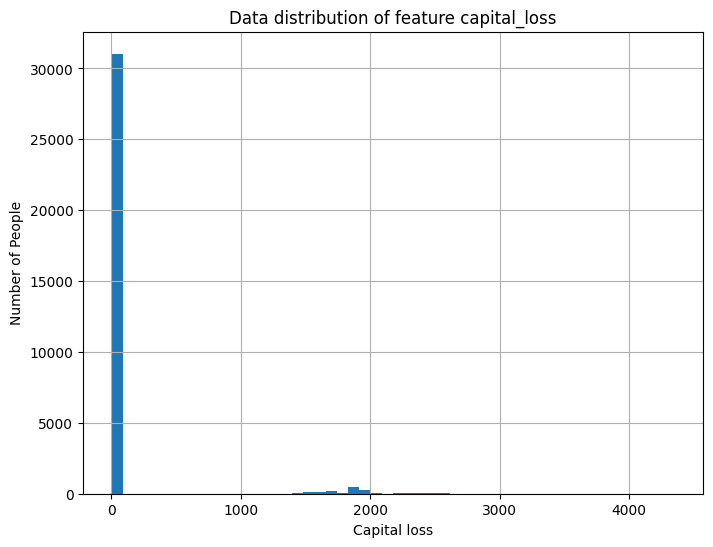

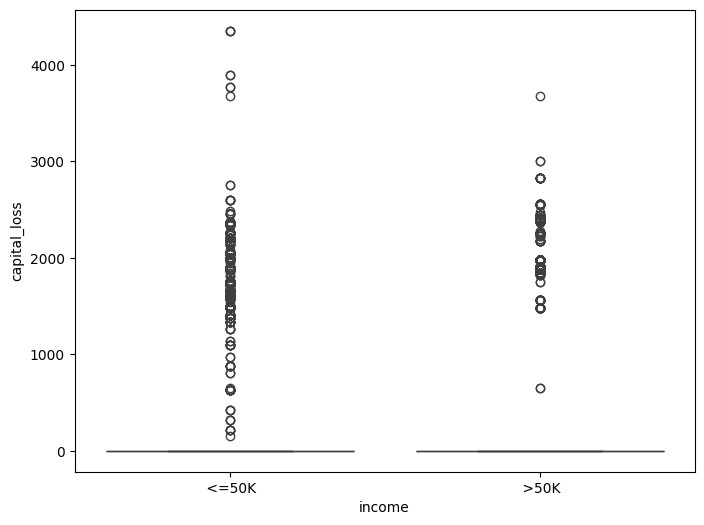

In [32]:
#**Feature *capital-loss***

var='capital_loss'
continuous_feature_analysis(train_data, var)

ax=train_data[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Capital loss')
plt.show()

sns.boxplot(y='capital_loss', x='income', data=train_data)
plt.show()

Distribution of data values of feature hours_per_week:
hours_per_week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64

Percentage of data distribution of feature hours_per_week:
hours_per_week
40    0.467338
50    0.086576
45    0.056018
60    0.045300
35    0.039833
        ...   
82    0.000031
92    0.000031
87    0.000031
74    0.000031
94    0.000031
Name: proportion, Length: 94, dtype: float64

Total unique values of feature hours_per_week: 94



,hours_per_week
count,32561.000000
mean,40.437456
std,12.347429
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


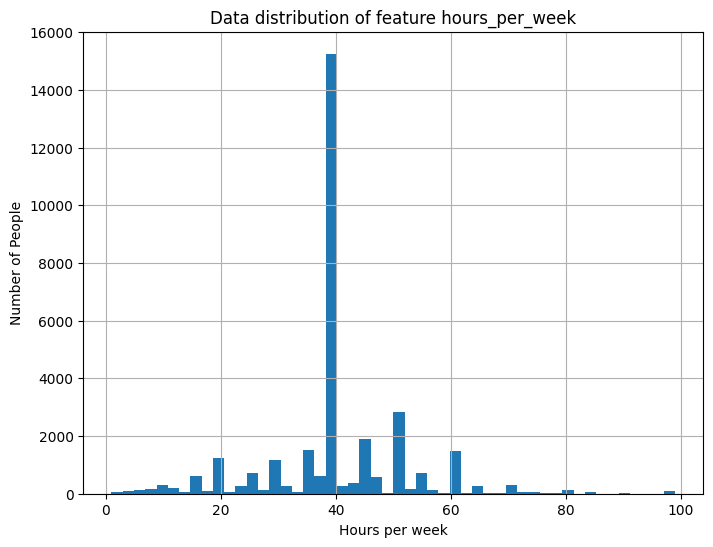

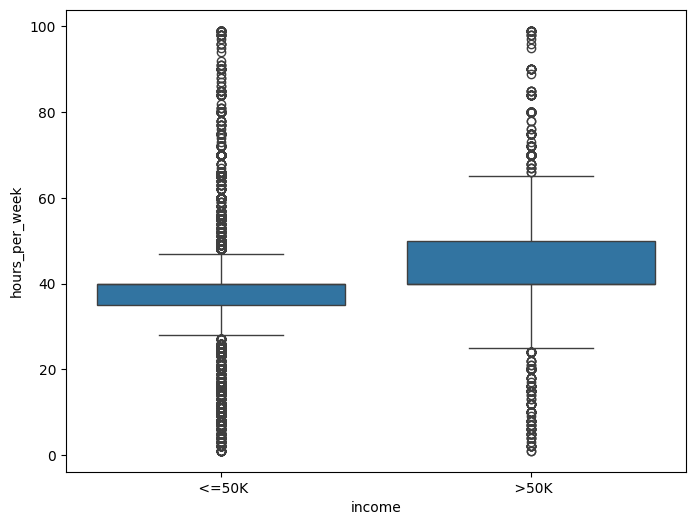

Percentage of people that work less than 40 hours per week and makes >$50K/yr:  2.2665151561684227
Percentage of people that work less than 40 hours per week and makes <=$50K/yr:  21.574890206074752
Percentage of people that work between 40 and 45 hours per week and makes >$50K/yr:  12.659316360062652
Percentage of people that work between 40 and 45 hours per week and makes <=$50K/yr:  41.57427597432511
Percentage of people that work more than 45 hours per week and makes >$50K/yr:  9.155124228371363
Percentage of people that work more than 45 hours per week and makes <=$50K/yr:  12.769878074997695


In [33]:
#**Feature *hours-per-week***

var='hours_per_week'
continuous_feature_analysis(train_data, var)

ax=train_data[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Hours per week')
plt.show()

sns.boxplot(y='hours_per_week', x='income', data=train_data)
plt.show()

print('Percentage of people that work less than 40 hours per week and makes >$50K/yr: ', len(train_data[(train_data['hours_per_week']<40) & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people that work less than 40 hours per week and makes <=$50K/yr: ', len(train_data[(train_data['hours_per_week']<40) & (train_data['income']==' <=50K')])/len(train_data)*100)
print('Percentage of people that work between 40 and 45 hours per week and makes >$50K/yr: ', len(train_data[((train_data['hours_per_week'] >= 40) & (train_data['hours_per_week'] <= 45)) & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people that work between 40 and 45 hours per week and makes <=$50K/yr: ', len(train_data[((train_data['hours_per_week'] >= 40) & (train_data['hours_per_week'] <= 45)) & (train_data['income']==' <=50K')])/len(train_data)*100)
print('Percentage of people that work more than 45 hours per week and makes >$50K/yr: ', len(train_data[(train_data['hours_per_week'] > 45) & (train_data['income']==' >50K')])/len(train_data)*100)
print('Percentage of people that work more than 45 hours per week and makes <=$50K/yr: ', len(train_data[(train_data['hours_per_week'] > 45) & (train_data['income']==' <=50K')])/len(train_data)*100)


Data values by class of feature native_country:
native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua  

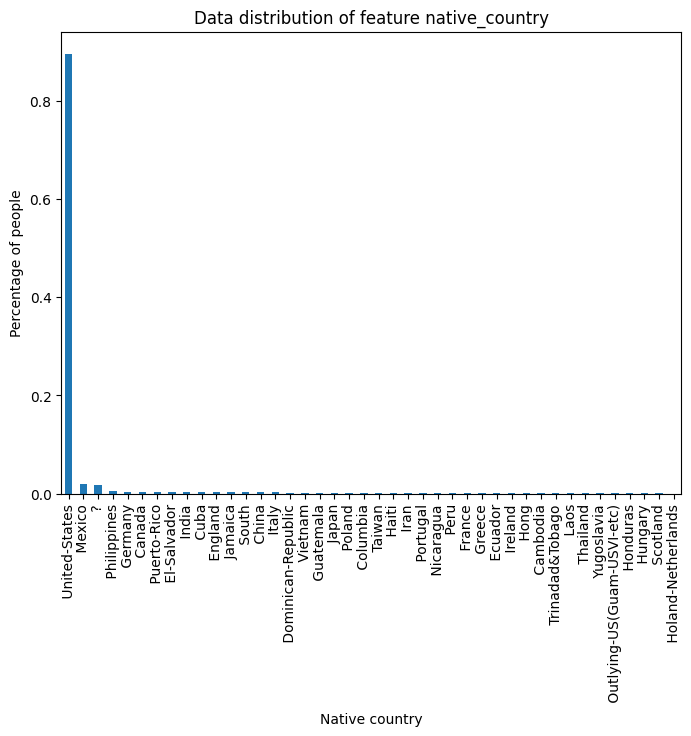

income,<=50K,>50K
native_country,,
?,0.749571,0.250429
Cambodia,0.631579,0.368421
Canada,0.677686,0.322314
China,0.733333,0.266667
Columbia,0.966102,0.033898
Cuba,0.736842,0.263158
Dominican-Republic,0.971429,0.028571
Ecuador,0.857143,0.142857
El-Salvador,0.915094,0.084906


In [34]:
#**Feature *native-country***

var='native_country'
categorical_feature_analysis(train_data, var)

##plot distribution
ax=train_data[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Native country')
plt.show()

pd.crosstab([train_data['native_country']], train_data['income'], normalize='index')

# **Relation between features**

### Relation between features sex, race, income and numerical ones:

### On average, it's possible to note that regardless sex and race, people who are older, have a higher education level, had greater capital gains and work more hours per week tend to make over when compared to others.

In [35]:
print(train_data['native_country'].dtype)

object


In [36]:
train_data['native_country'] = train_data['native_country'].astype('category')

In [37]:
print(train_data['native_country'].dtype)

category


In [38]:
train_data['native_country'] = train_data['native_country'].cat.codes

In [39]:
train_data['native_country'] = train_data['native_country'].astype(float)

In [40]:
print(train_data['native_country'].dtype)

float64


In [41]:
display(train_data.groupby(['sex', 'race', 'income']).aggregate)

<bound method DataFrameGroupBy.aggregate of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7c50bddb0700>>

In [42]:
display(train_data.groupby(['workclass', 'income']).aggregate)

<bound method DataFrameGroupBy.aggregate of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7c50bcf2bc10>>

In [43]:
display(train_data.groupby(['occupation', 'income']).aggregate)

<bound method DataFrameGroupBy.aggregate of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7c5114038a90>>

# **ML Steps**

In [44]:
print(train_data.columns)

features=['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

print(len(features))

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')
6


In [45]:
X = train_data[features]
y = train_data['income']
display(X.head())
display(y.head())

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [46]:
#Data split: train and validation

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, stratify=y, random_state=376) #test_size=0.2, 0.3
print(train_X.head())
print(train_y.head())

       age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
27780   38  287701              7             0             0              48
12350   32  117779              9             0             0              35
12202   30  467108             14             0             0              44
5735    20  258517             10             0             0              25
31399   28  401886              9             0             0              20
27780      >50K
12350     <=50K
12202      >50K
5735      <=50K
31399     <=50K
Name: income, dtype: object


# **ML Models**

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Assuming train_X, train_y, val_X, val_y are already defined

dummy_model = DummyClassifier(strategy='most_frequent', random_state=376)
dummy_model.fit(train_X, train_y)
dummy_prediction = dummy_model.predict(val_X)

# Calculate performance metrics
accuracy = accuracy_score(val_y, dummy_prediction)
conf_matrix = confusion_matrix(val_y, dummy_prediction)

In [48]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7592433361994841
Confusion Matrix:
[[6181    0]
 [1960    0]]


### The DummyClassifier achieved 0.76 of accuracy ( 76% correct predictions)


TN:  5867 FP:  314 FN:  1208 TP:  752


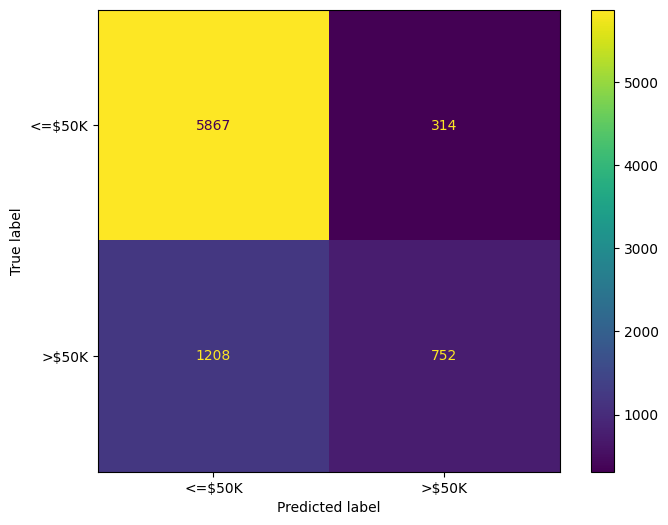

In [49]:
#Logistic Regression algorithm


lr_model = LogisticRegression(max_iter=1000, random_state=376)
lr_model.fit(train_X, train_y)
lr_prediction=lr_model.predict(val_X)
calc_confusion_matrix(val_y, lr_prediction)

max_depth: 1 fit score: 0.8026617526617527 validation score: 0.8024812676575359
max_depth: 2 fit score: 0.8026617526617527 validation score: 0.8024812676575359
max_depth: 3 fit score: 0.8078624078624078 validation score: 0.8039552880481513
max_depth: 4 fit score: 0.8190827190827191 validation score: 0.8162387913032797
max_depth: 5 fit score: 0.833988533988534 validation score: 0.8286451295909594
max_depth: 6 fit score: 0.8367731367731368 validation score: 0.8288907996560619
max_depth: 7 fit score: 0.8400900900900901 validation score: 0.8297506448839209
max_depth: 8 fit score: 0.8416461916461917 validation score: 0.8292593047537158
max_depth: 9 fit score: 0.8443898443898444 validation score: 0.8292593047537158
max_depth: 10 fit score: 0.8481572481572481 validation score: 0.8270482741677927


TN:  5939 FP:  242 FN:  1144 TP:  816


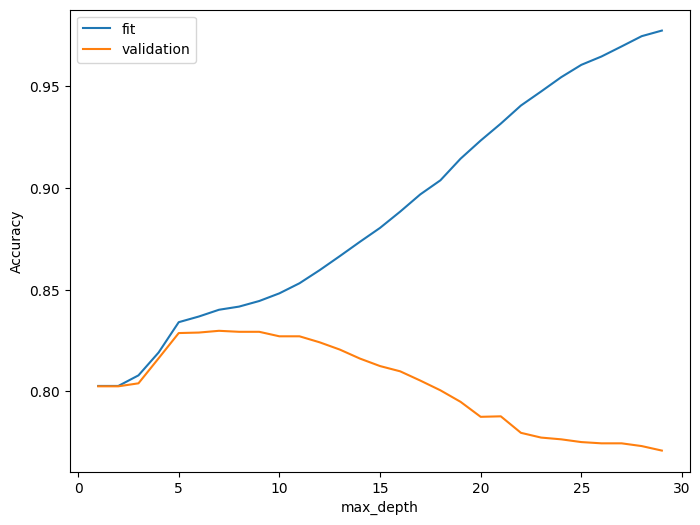

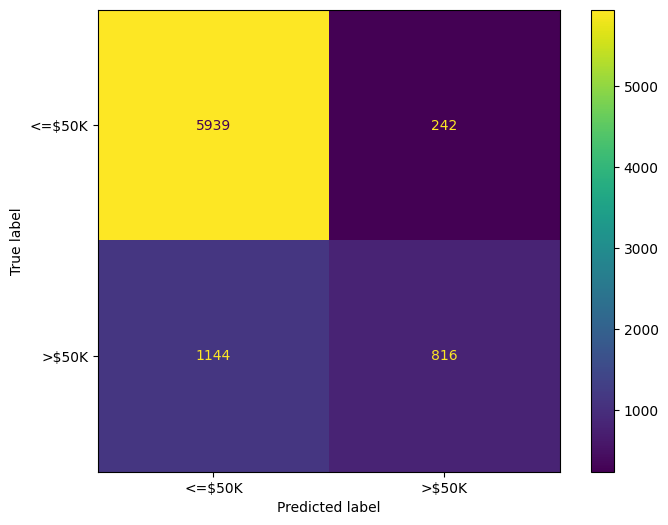

In [50]:
#Decision Tree algorithm

#simple search to define the max_depth parameter
train=[]
valid=[]
for i in range(1,30):
  dtree_model = DecisionTreeClassifier(max_depth=i, random_state=376)
  dtree_model.fit(train_X, train_y)
  train.append(dtree_model.score(train_X, train_y))
  valid.append(dtree_model.score(val_X, val_y))

for i in range(10):
  print('max_depth:', i+1, 'fit score:', train[i], 'validation score:', valid[i]) #best trade-off between fit and validation score when max_depth=6
print('')

ax=sns.lineplot(x=range(1,30), y = train, label='fit')
ax=sns.lineplot(x=range(1,30), y = valid, label='validation')
ax.set(xlabel='max_depth', ylabel='Accuracy')

dtree_model = DecisionTreeClassifier(max_depth = 7, random_state=376)
dtree_model.fit(train_X, train_y)
dtree_prediction=dtree_model.predict(val_X)
calc_confusion_matrix(val_y, dtree_prediction)



TN:  5540 FP:  641 FN:  976 TP:  984


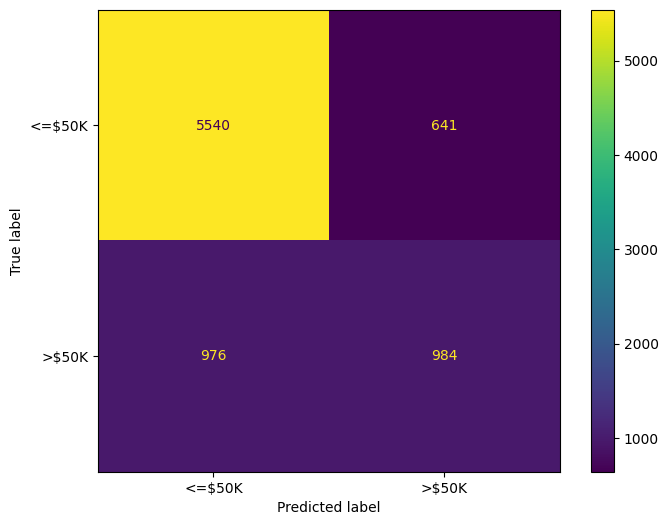

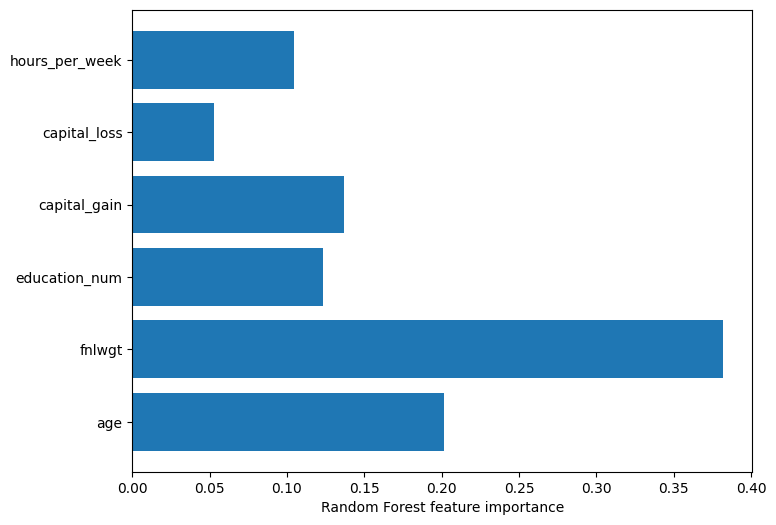

In [51]:
#Random Forest algorithm

rf_model = RandomForestClassifier(n_estimators=500, random_state=376)
rf_model.fit(train_X, train_y)
rf_prediction=rf_model.predict(val_X)
calc_confusion_matrix(val_y, rf_prediction)
plt.show()

plt.barh(features, rf_model.feature_importances_)
plt.xlabel("Random Forest feature importance")
plt.show()